# Exploratory Data Analysis on Enron Email

# Objectives 
1. Extract text corpus from enron email
2. Explore data structure and perform some cleaning if needed
3. Form hypothesis, frame questions on possible project direction

## 1. Data Load and Checks

In [ ]:
import tarfile
import os

archive_path = '..\data\enron_mail_20150507.tar.gz'
destination_path = '..\data\extracted_data'


# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Open the tar.gz file and extract all its contents
with tarfile.open(archive_path, 'r:gz') as tar:
    tar.extractall(path=destination_path)

print(f"All files from '{archive_path}' extracted to '{destination_path}'")



All files from '..\data\enron_mail_20150507.tar.gz' extracted to '4_enron_mail_nlp\data\extracted_data'


### 1a. Loading Data

  1. Manualy looked into file w_review_train.csv using notepad to determine its structure. The data seem to be delimited by semi-colon ";" and does not have any headings.
  2. I decided to load it into a Panda dataframe and remove duplicate rows (7 dupe rows were deleted)

In [ ]:
import pandas as pd
import email
from email import policy
import os
import glob
import io
import chardet

# Function to parse a single email file and extract relevant data
def parse_email_file(file_path):
    """
    Parses an email file and returns a dictionary with extracted information.
    """
    try:
        # Detect the file's encoding first
        with open(file_path, 'rb') as raw_file:
            raw_data = raw_file.read()
            detected_encoding = chardet.detect(raw_data)['encoding']


        with open(file_path, 'r', encoding=detected_encoding, errors='replace') as email_file:
            content = email_file.read()#email.message_from_file(email_file, policy=policy.default)
            content = io.StringIO(content)
            msg = email.message_from_file(content, policy=policy.default)
            
            message_id = msg['Message-ID']
            date = msg['Date']
            subject = msg['Subject']
            from_addr = msg['From']
            person_box = msg['X-Origin']
            
            # Handle both plain text and multipart emails for the body
            if msg.is_multipart():
                body = ""
                for part in msg.walk():
                    if part.get_content_type() == "text/plain":
                        body = part.get_payload(decode=True).decode(errors='ignore')
                        break
            else:
                body = msg.get_payload(decode=True).decode(errors='ignore')
            
            email_body = body.strip()

            return {
                'subject': subject,
                'date': date,
                'date_short': date[:17],
                'message_id': message_id,
                'from_addr': from_addr,
                'person_box': person_box,
                'email_body': email_body
            }
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# --- Main script ---


# Create an empty list to store the data from each email
all_email_data = []


# Define the folder containing your email files
# Replace 'path/to/your/email/folder' with the actual path
# folder_path = '..\data\extracted_data\maildir\gilbertsmith-d\deleted_items' 
folder_path = '..\data\extracted_data\maildir' 
mailboxes=['inbox', 'deleted_items', 'sent_items', 'all_documents', 'calendar', 'contacts', 'drafts', 'notes', 'tasks']

for person_folder in os.listdir(folder_path):

    # for mailbox in mailboxes:
    # Use glob to find all files (assuming they are text files with no specific extension)
    # Modify the pattern '*.txt' if your email files have a different extension
    for file_path in glob.glob(os.path.join(folder_path,person_folder,'deleted_items', '*')):
        if os.path.isfile(file_path):
            email_data = parse_email_file(file_path)
        if email_data:
            all_email_data.append(email_data)

    for file_path in glob.glob(os.path.join(folder_path,person_folder,'deleted_items\*', '*')):
        
        if os.path.isfile(file_path):
            email_data = parse_email_file(file_path)
        if email_data:
            all_email_data.append(email_data)

# Create the pandas DataFrame from the list of dictionaries
df_deleted = pd.DataFrame(all_email_data)

# Print the resulting DataFrame
df_deleted['date_short']  = pd.to_datetime(df_deleted['date_short'])
df_deleted.head(5)

# You can also save the DataFrame to a CSV file
# df.to_csv('extracted_emails.csv', index=False)


,subject,date,date_short,message_id,from_addr,person_box,email_body
0,Fwd: Bishops Corner,"Sun, 30 Dec 2001 10:19:42 -0800",2001-12-30,<21543395.1075855374340.JavaMail.evans@thyme>,pallen70@hotmail.com,Allen-P,">From: ""Greg Thorse"" \n>To: \n>CC: ""Phillip Al..."
1,Your Approval is Overdue: Access Request for m...,"Thu, 27 Dec 2001 17:16:46 -0800",2001-12-27,<25363451.1075855374674.JavaMail.evans@thyme>,arsystem@mailman.enron.com,Allen-P,This request has been pending your approval fo...
2,NT Earnings Information,"Thu, 18 Oct 2001 15:21:22 -0700",2001-10-18,<19705494.1075858631723.JavaMail.evans@thyme>,webmaster@earnings.com,Allen-P,"If you cannot read this email, please click he..."
3,50% Hotel Discount Notice #7734228 for PHILLIP,"Thu, 18 Oct 2001 14:57:30 -0700",2001-10-18,<7996335.1075858632216.JavaMail.evans@thyme>,discount@open2win.oi3.net,Allen-P,"[IMAGE] \t\t[IMAGE] \t\n\t\tDear PHILLIP, C..."
4,UPDATE - Supported Internet Email Addresses,"Thu, 18 Oct 2001 15:10:12 -0700",2001-10-18,<8914065.1075858632242.JavaMail.evans@thyme>,no.address@enron.com,Allen-P,"Earlier this week, Enron Global Technology ann..."
5,Conference Call Today with FERC Staff,"Thu, 18 Oct 2001 14:51:19 -0700",2001-10-18,<31706076.1075858632278.JavaMail.evans@thyme>,ray.alvarez@enron.com,Allen-P,A conference call was held today with FERC sta...
6,Weekend Outage Report for 10-19-01 through 10-...,"Thu, 18 Oct 2001 14:26:44 -0700",2001-10-18,<6097593.1075858632307.JavaMail.evans@thyme>,no.address@enron.com,Allen-P,----------------------------------------------...
7,Comments of the Other Parties on El Paso Syste...,"Thu, 18 Oct 2001 16:40:42 -0700",2001-10-18,<7016835.1075858632342.JavaMail.evans@thyme>,w..cantrell@enron.com,Allen-P,This is a summary of the comments we've receiv...
8,Western Price Survey,"Fri, 19 Oct 2001 11:07:20 -0700",2001-10-19,<21687871.1075858632365.JavaMail.evans@thyme>,aod@newsdata.com,Allen-P,Here is the end-of-week report from NewsData.\...
9,FW: Security Smart ID Tags-Off Property Usage,"Fri, 19 Oct 2001 06:11:32 -0700",2001-10-19,<6254563.1075858632387.JavaMail.evans@thyme>,bodyshop@enron.com,Allen-P,"-----Original Message-----\nFrom: \tWright, Le..."


In [7]:
for person_folder in os.listdir(folder_path):

    # for mailbox in mailboxes:
    # Use glob to find all files (assuming they are text files with no specific extension)
    # Modify the pattern '*.txt' if your email files have a different extension
    for file_path in glob.glob(os.path.join(folder_path,person_folder,'all_documents', '*')):
        email_data = parse_email_file(file_path)
        if email_data:
            all_email_data.append(email_data)

# Create the pandas DataFrame from the list of dictionaries
df_all = pd.DataFrame(all_email_data)
df_all['date_short']  = pd.to_datetime(df_all['date_short'])
# Print the resulting DataFrame
df_all.head(10)

,subject,date,date_short,message_id,from_addr,person_box,email_body
0,Fwd: Bishops Corner,"Sun, 30 Dec 2001 10:19:42 -0800","Sun, 30 Dec 2001",<21543395.1075855374340.JavaMail.evans@thyme>,pallen70@hotmail.com,Allen-P,">From: ""Greg Thorse"" \n>To: \n>CC: ""Phillip Al..."
1,Your Approval is Overdue: Access Request for m...,"Thu, 27 Dec 2001 17:16:46 -0800","Thu, 27 Dec 2001",<25363451.1075855374674.JavaMail.evans@thyme>,arsystem@mailman.enron.com,Allen-P,This request has been pending your approval fo...
2,NT Earnings Information,"Thu, 18 Oct 2001 15:21:22 -0700","Thu, 18 Oct 2001",<19705494.1075858631723.JavaMail.evans@thyme>,webmaster@earnings.com,Allen-P,"If you cannot read this email, please click he..."
3,50% Hotel Discount Notice #7734228 for PHILLIP,"Thu, 18 Oct 2001 14:57:30 -0700","Thu, 18 Oct 2001",<7996335.1075858632216.JavaMail.evans@thyme>,discount@open2win.oi3.net,Allen-P,"[IMAGE] \t\t[IMAGE] \t\n\t\tDear PHILLIP, C..."
4,UPDATE - Supported Internet Email Addresses,"Thu, 18 Oct 2001 15:10:12 -0700","Thu, 18 Oct 2001",<8914065.1075858632242.JavaMail.evans@thyme>,no.address@enron.com,Allen-P,"Earlier this week, Enron Global Technology ann..."
5,Conference Call Today with FERC Staff,"Thu, 18 Oct 2001 14:51:19 -0700","Thu, 18 Oct 2001",<31706076.1075858632278.JavaMail.evans@thyme>,ray.alvarez@enron.com,Allen-P,A conference call was held today with FERC sta...
6,Weekend Outage Report for 10-19-01 through 10-...,"Thu, 18 Oct 2001 14:26:44 -0700","Thu, 18 Oct 2001",<6097593.1075858632307.JavaMail.evans@thyme>,no.address@enron.com,Allen-P,----------------------------------------------...
7,Comments of the Other Parties on El Paso Syste...,"Thu, 18 Oct 2001 16:40:42 -0700","Thu, 18 Oct 2001",<7016835.1075858632342.JavaMail.evans@thyme>,w..cantrell@enron.com,Allen-P,This is a summary of the comments we've receiv...
8,Western Price Survey,"Fri, 19 Oct 2001 11:07:20 -0700","Fri, 19 Oct 2001",<21687871.1075858632365.JavaMail.evans@thyme>,aod@newsdata.com,Allen-P,Here is the end-of-week report from NewsData.\...
9,FW: Security Smart ID Tags-Off Property Usage,"Fri, 19 Oct 2001 06:11:32 -0700","Fri, 19 Oct 2001",<6254563.1075858632387.JavaMail.evans@thyme>,bodyshop@enron.com,Allen-P,"-----Original Message-----\nFrom: \tWright, Le..."


In [ ]:
# df_all['date_short']  = pd.to_datetime(df_all['date_short'])

In [19]:

# df_deleted['date']  = df_deleted['date'].dt.tz_convert('UTC').dt.tz_localize(None)
df_deleted#.describe()
df_deleted.dtypes

subject               object
date                  object
date_short    datetime64[ns]
message_id            object
from_addr             object
person_box            object
email_body            object
dtype: object

In [13]:
df_deleted['date_short']  = pd.to_datetime(df_deleted['date_short'])
df_deleted.dtypes

subject               object
date                  object
date_short    datetime64[ns]
message_id            object
from_addr             object
person_box            object
email_body            object
dtype: object

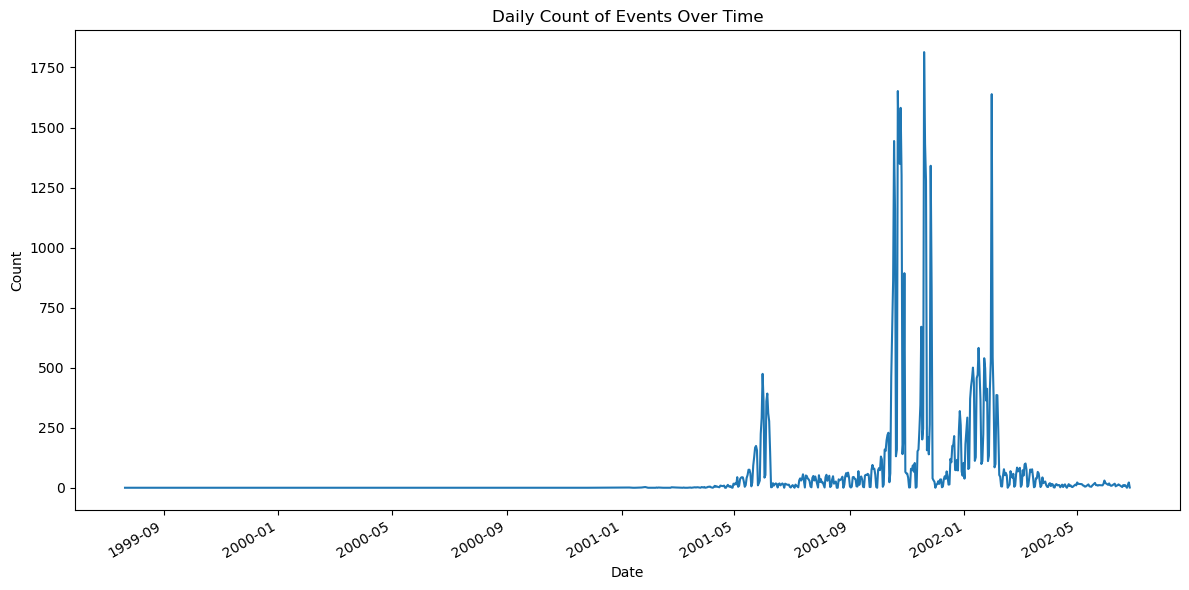

In [20]:
import numpy as np
import matplotlib.pyplot as plt


df_deleted_1999_2003 = df_deleted[df_deleted.date_short.dt.year.between(1999, 2003)]
daily_counts = df_deleted_1999_2003.groupby('date_short').size()
daily_counts

daily_counts.plot(
    kind='line',
    figsize=(12, 6),
    title='Daily Count of Events Over Time'
)

# Add labels for clarity
plt.xlabel('Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

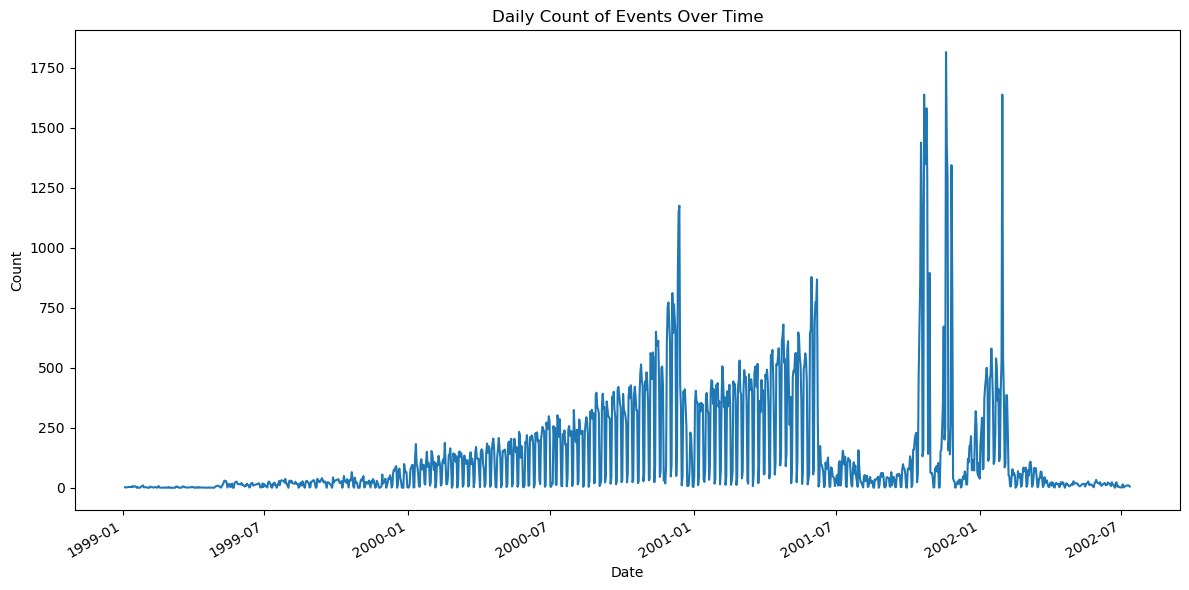

In [10]:
df_all_1999_2003 = df_all[df_all.date_short.dt.year.between(1999, 2003)]
daily_all_counts = df_all_1999_2003.groupby('date_short').size()


daily_all_counts.plot(
    kind='line',
    figsize=(12, 6),
    title='Daily Count of Events Over Time'
)

# Add labels for clarity
plt.xlabel('Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()